In [2]:
import jax.numpy as jnp
import matplotlib.pyplot as plt

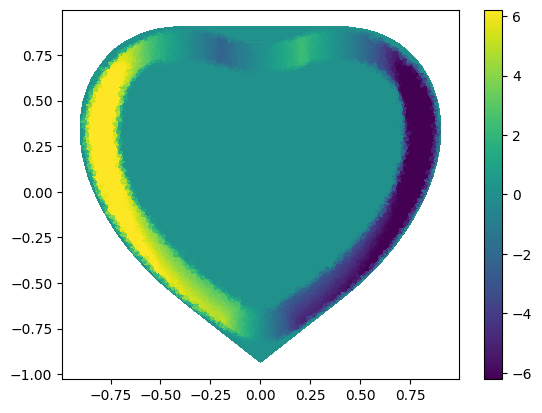

In [3]:
data = jnp.load("data/heart_points.npy")
# data = jnp.load("data/square_points.npy")
x_batch = data.copy()
ansatz2 = jnp.load("data/heart_bc_smooth.npy")
ansatz = jnp.load("data/heart_ansatz.npy")
ansatz_x = jnp.load("data/heart_ansatz_x.npy")
ansatz_y = jnp.load("data/heart_ansatz_y.npy")
ansatz_xx = jnp.load("data/heart_ansatz_xx.npy")
ansatz_yy = jnp.load("data/heart_ansatz_yy.npy")

# ansatz = jnp.load("data/square_bc_smooth.npy")

# ansatz2 = {tuple(x_batch[i]): ansatz.reshape(-1)[i] for i in range(x_batch.shape[0])}

u = jnp.ones(ansatz.shape) * ansatz_x

plt.tripcolor(x_batch[:, 0], x_batch[:, 1], u.reshape(-1))
plt.colorbar()
XMIN, XMAX, YMIN, YMAX = -1, 1, -1, 1



In [4]:
import numpy as np
from fbpinns.domains import RectangularDomainND
from fbpinns.problems import GravityHeart, Gravity#, GravityDonut
from fbpinns.decompositions import MultilevelRectangularDecompositionND
from fbpinns.networks import FCN
from fbpinns.schedulers import AllActiveSchedulerND
from fbpinns.constants import Constants, get_subdomain_ws
from fbpinns.trainers import FBPINNTrainer

# w = 3.9
w=2.6
# EXPERIMENT1 --- WITH 2,128,128,1
# subdomain_xss = [[np.array([0.0]),np.array([0.0])]]
# subdomain_wss = [[np.array([2.]),np.array([2.])]]

#EXPERIMENT2 --- WITH 2,12,12,1
# subdomain_xss = [[np.linspace(XMIN,XMAX,n_),np.linspace(YMIN,YMAX,n_)] for n_ in (10,)]
# subdomain_wss = [get_subdomain_ws(subdomain_xss[0], w)]

#EXPERIMENT2 --- WITH 2,12,12,1

subdomain_xss =\
    [[np.linspace(XMIN,XMAX,n_),np.linspace(YMIN,YMAX,n_)] for n_ in (4,)] #+\
    # [[np.linspace(XMIN,XMAX,n_),np.linspace(YMIN,YMAX,n_)] for n_ in (8,)] +\
    # [[np.linspace(XMIN,XMAX,n_),np.linspace(YMIN,YMAX,n_)] for n_ in (16,)] #+\
#     # [[np.linspace(XMIN,XMAX,n_),np.linspace(YMIN,YMAX,n_)] for n_ in (32,)] #+\
#     # [[np.linspace(XMIN,XMAX,n_),np.linspace(YMIN,YMAX,n_)] for n_ in (64,)]
subdomain_wss =\
    [get_subdomain_ws(subdomain_xss[0], w)]# +\
    # [get_subdomain_ws(subdomain_xss[1], w)] +\
    # [get_subdomain_ws(subdomain_xss[2], w)] #+\
    # [get_subdomain_ws(subdomain_xss[3], w)] #+\
    # [get_subdomain_ws(subdomain_xss[4], w)]

# subdomain_xss =\
#     [[np.linspace(XMIN,XMAX,n_),np.linspace(YMIN,YMAX,n_)] for n_ in (4,)] +\
#     [[np.linspace(XMIN,XMAX,n_),np.linspace(YMIN,YMAX,n_)] for n_ in (8,)] +\
#     [[np.linspace(XMIN,XMAX,n_),np.linspace(YMIN,YMAX,n_)] for n_ in (16,)]
# subdomain_wss =\
#     [get_subdomain_ws(subdomain_xss[0], w)] +\
#     [get_subdomain_ws(subdomain_xss[1], w)] +\
#     [get_subdomain_ws(subdomain_xss[2], w)]


c = Constants(
    domain=RectangularDomainND,
    domain_init_kwargs = dict(
        xmin=np.array([XMIN,YMIN]),
        xmax=np.array([XMAX,YMAX])
    ),
    problem=GravityHeart,
    problem_init_kwargs = dict(
        # sd=0.1,
        ansatz=ansatz,
        ansatz_x=ansatz_x,
        ansatz_xx=ansatz_xx,
        ansatz_y=ansatz_y,
        ansatz_yy=ansatz_yy,
    ),
    decomposition=MultilevelRectangularDecompositionND,
    decomposition_init_kwargs=dict(
        subdomain_xss=subdomain_xss,
        subdomain_wss=subdomain_wss,
        unnorm=(0.,3.),
    ),
    network=FCN,
    network_init_kwargs = dict(
        layer_sizes = (2, 16, 16, 1),
    ),
    optimiser_kwargs=dict(learning_rate=1e-4),
    scheduler = AllActiveSchedulerND,
    ns=((10,1),),
    n_test=(2,2),
    n_steps=100000,
    clear_output=True,
)

run = FBPINNTrainer(c)
all_params = run.train()

[INFO] 2024-12-16 10:14:31 - [i: 100000/100000] Training complete
